1. Возьмите из прошлого домашнего задания ряд — стационарный и не стационарный.   
2. Приблизьте оба варианта моделями из класса MA.   
3. Оцените качество и пришлите соображения, почему была выбрана та или иная модель.   

In [118]:
import pandas as pd
import numpy as np
import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt
from sklearn.metrics import mean_squared_error

In [22]:
df_random = np.random.normal(size=70)

In [6]:
df_other = pd.read_csv('monthly-sales-of-company-x-jan-6.csv', sep=',')
df_other.head(2)

,Month,Count
0,1965-01,154
1,1965-02,96


<Axes: >

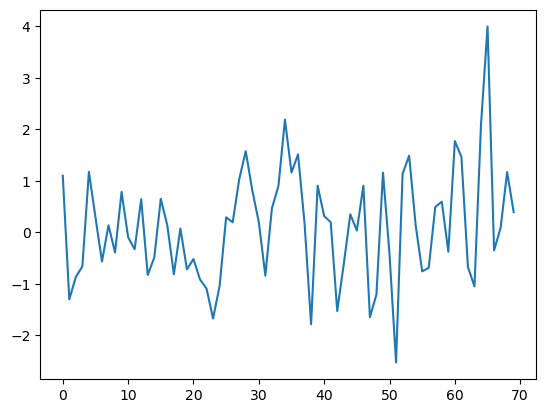

In [24]:
pd.Series(df_random).plot()

<Axes: >

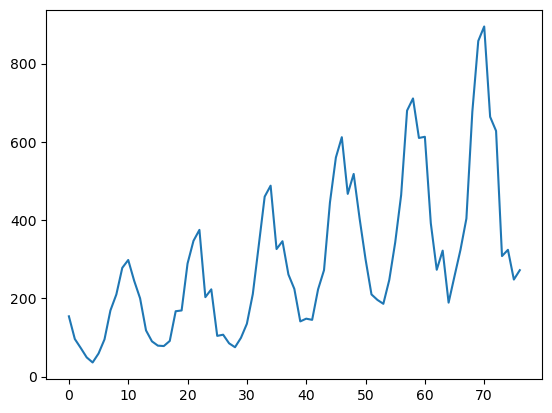

In [26]:
df_other.Count.plot()

In [60]:
from sklearn.metrics import mean_squared_error

In [48]:
def mse(X):
    alpha, beta, gamma = X
    result = triple_exponential_smoothing(train1, 12, alpha, beta, gamma, len(test))
    predictions = result[-len(test):]
    error = mean_squared_error(predictions, test)
    return error

In [104]:
def double_ema_with_preds(series, alpha, beta, n_preds):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha * value + (1-alpha) * (level+trend)
        trend = beta * (level-last_level) + (1-beta) * trend
        result.append(level+trend)
        
    preds = []
    for n in range(n_preds):
        value = result[-1]
        last_level, level = level, alpha * value + (1-alpha) * (level+trend)
        trend = beta * (level-last_level) + (1-beta)*trend
        result.append(level+trend)
        preds.append(level+trend)

    return pd.Series(result)

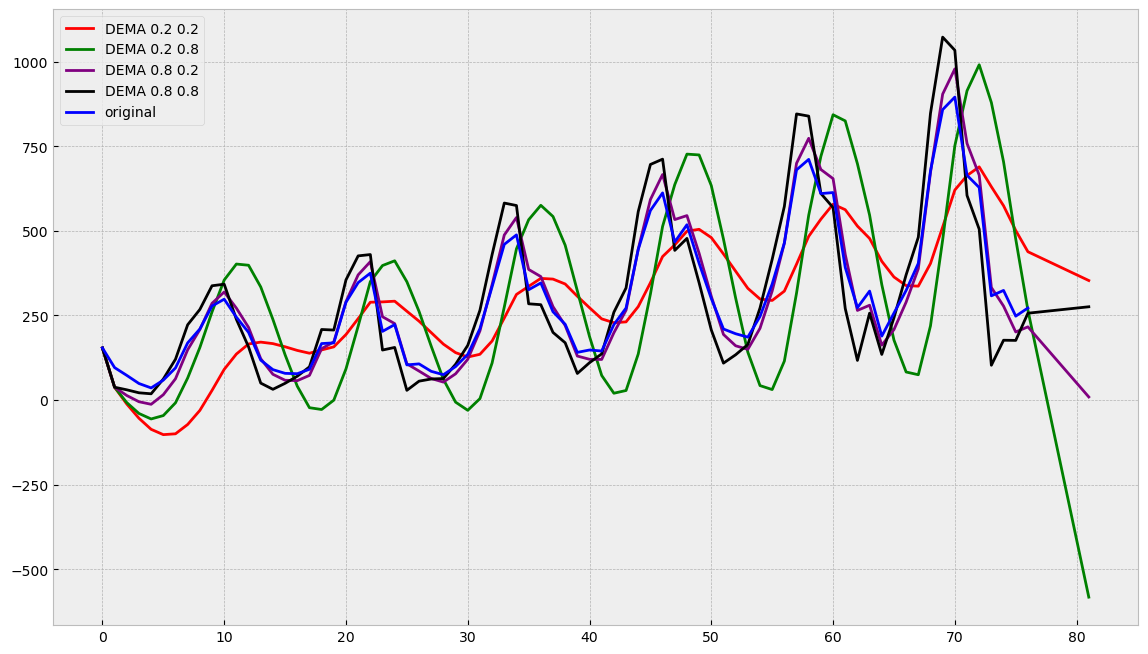

In [108]:
alphas = [0.2,0.2,0.8,0.8]
bettas = [0.2,0.8,0.2,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    for i in range(len(alphas)):
        ser = double_ema_with_preds(df_other.Count, alphas[i], bettas[i], 5)
        plt.plot(ser, color=colors[i], linewidth='2', label='DEMA {} {}'.format(alphas[i], bettas[i]))
    plt.plot(df_other.Count, color='blue',label='original')
    plt.legend()

In [110]:
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return wma

In [114]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

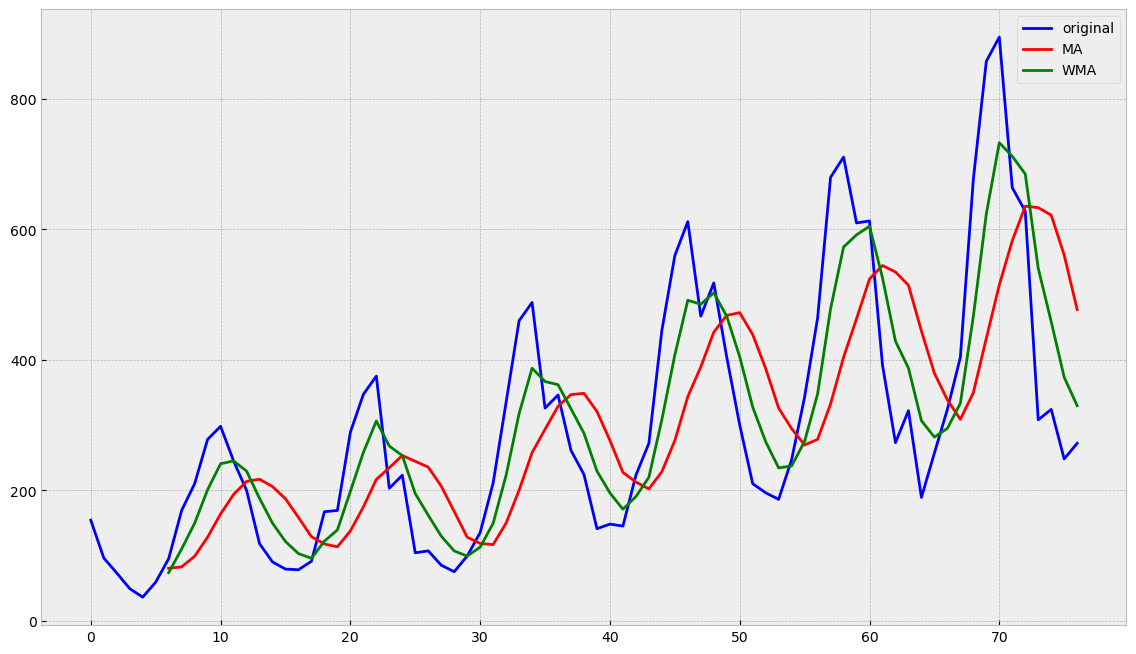

In [116]:
wma = weighted_moving_average(df_other.Count, 7, [1,1,2,3,5,8,13])
ma = moving_average(df_other.Count, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(df_other.Count, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='green', linewidth='2', label='WMA')
    plt.legend()

## ошибки для нестационарного ряда

In [144]:
print("WMA + non-stationary: " + str(mean_squared_error(wma[7:], df_other.Count[7:])))

WMA + non-stationary: 8634.993178538634


In [148]:
ser = double_ema_with_preds(df_other.Count, 0.8, 0.2, 5)

In [154]:
print("DEMA + non-stationary: " + str(mean_squared_error(ser[0:77], df_other.Count)))

DEMA + non-stationary: 1226.5989712204112


In [157]:
s = pd.Series(df_random)

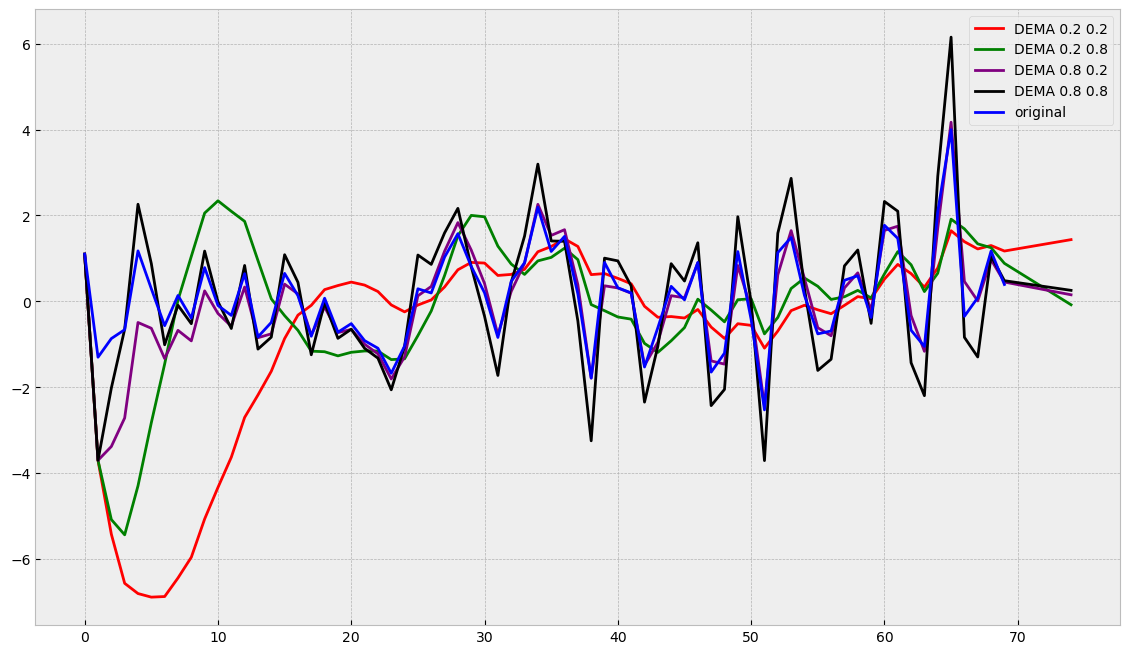

In [161]:
alphas = [0.2,0.2,0.8,0.8]
bettas = [0.2,0.8,0.2,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    for i in range(len(alphas)):
        ser = double_ema_with_preds(s, alphas[i], bettas[i], 5)
        plt.plot(ser, color=colors[i], linewidth='2', label='DEMA {} {}'.format(alphas[i], bettas[i]))
    plt.plot(s, color='blue',label='original')
    plt.legend()

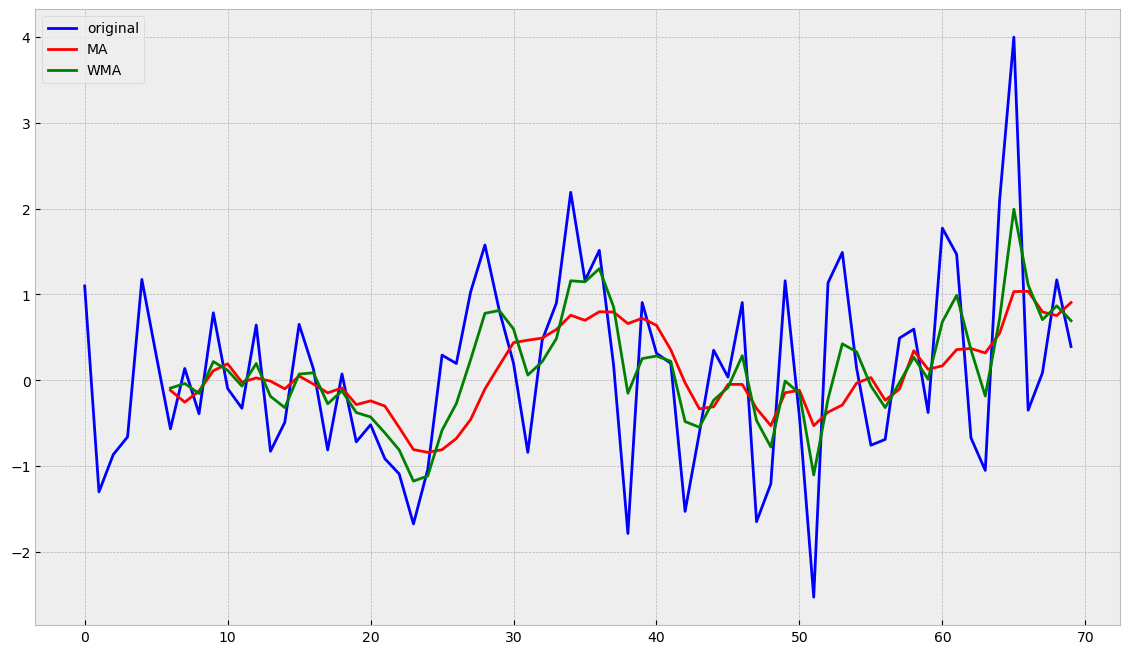

In [165]:
wma = weighted_moving_average(s, 7, [1,1,2,3,5,8,13])
ma = moving_average(s, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(s, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='green', linewidth='2', label='WMA')
    plt.legend()

## ошибки для стационарного ряда

In [169]:
print("WMA + stationary: " + str(mean_squared_error(wma[7:], s[7:])))

WMA + stationary: 0.5293597479046557


In [177]:
ser = double_ema_with_preds(s, 0.8, 0.2, 5)

In [183]:
print("DEMA + stationary: " + str(mean_squared_error(ser[0:70], s)))

DEMA + stationary: 0.3611638446550592


# Выводы

В обоих случаях модель с двойным экспоненциальным сглаживанием показала себя лучше чем взвешанное скользящее среднее